In [78]:
import os
from astropy.io import fits

import numpy as np

#%%
hdu = fits.open('pn_expo_500_2000_detxy.ds')
hdu.info()

# %%
#
# now make it a mask image
#
mask = hdu[0].data > 0.0
#
hdu_out = hdu.copy()
hdu_out[0].data = mask.astype(np.ubyte)
hdu_out[0].scale('ubyte')
#print (hdu[0].header['BITPIX'])

hdu_out.writeto('pn_mask_500_2000_detxy_1x.ds',overwrite=True)

# Upscale the mask image 2x
hdu_out[0].data = hdu_out[0].data.repeat(2,axis=0).repeat(2, axis=1)
hdu_out.writeto('pn_mask_500_2000_detxy_2x.ds',overwrite=True)

# Upscale the mask image 4x
hdu_out[0].data = hdu_out[0].data.repeat(2,axis=0).repeat(2, axis=1)
hdu_out.writeto('pn_mask_500_2000_detxy_4x.ds',overwrite=True)


Filename: pn_expo_500_2000_detxy.ds
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     178   (403, 411)   float32   


In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt

In [2]:
hdu_fits = fits.open('pn_mask_500_2000_detxy_1x.ds')
det_mask = hdu_fits['PRIMARY'].data
# det_mask = exp_map > 0
# exp_map = np.flipud(exp_map) # For some reason the data is loaded with an flipped y axis

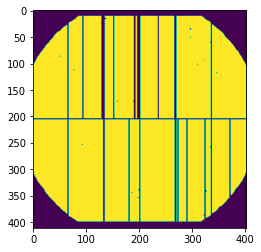

In [3]:
plt.imshow(det_mask)

In [4]:
hdu_1 = fits.open('/home/sam/Documents/ESA/tech_talk/sim/0852980601_image_split_500_2000_50ks_1_1.fits')
img1x = hdu_1['PRIMARY'].data

In [5]:
img1x_masked = img1x * det_mask

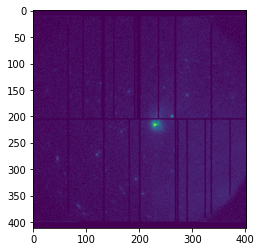

In [6]:
plt.imshow(np.sqrt(img1x))

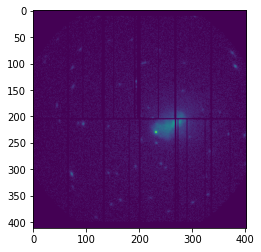

In [76]:
plt.imshow(np.sqrt(img1x_masked))

In [64]:
img1x_masked

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [65]:
img1x

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 3, 1, 0]], dtype=int32)

In [7]:
hdu_1['PRIMARY'].data = img1x_masked
hdu_1.writeto("masked1x.fits", overwrite=True)

In [56]:
img = color.rgb2gray(io.imread('xmm_chandra_overlay.png'))
img = 1.0 - img

<ipython-input-56-31496de024cb>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(io.imread('xmm_chandra_overlay.png'))


In [57]:
img[0][0]

0.0039215686274509665

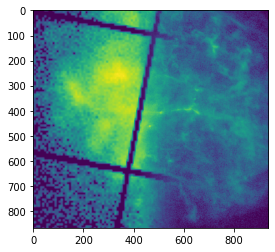

In [58]:
plt.imshow(img)

In [59]:
# Normalize the image such that all the values are between 0 and 1
img = img/np.max(img) 
# Idealy this would be the image that would be send to wandb, such that all the colormap and scaling operations can be done at the wandb side. 
# In a lot of scenarios it is not clear at the start what kind of colormap and scaling would be usefull

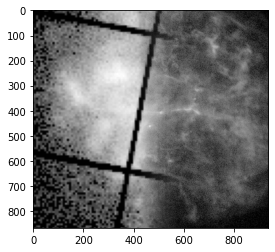

In [60]:
# The image has one channel, I force matplotlib to use the gray colormap here. 
# By default matplotlib applies the viridis colormap to single channel images
plt.imshow(img, cmap="gray")
plt.show()

In [35]:
# Load a colormap, a full list can be found on https://matplotlib.org/stable/gallery/color/colormap_reference.html
plasma_colormap = cm.get_cmap("plasma")

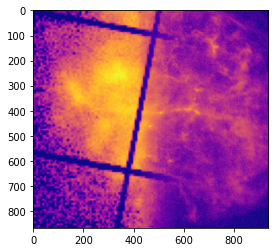

In [61]:
# Convert the images to plasma colormap
plasma_img = plasma_colormap(img)
plt.imsave("plasma_2.png", plasma_img)
plt.imshow(plasma_img)

plt.show()

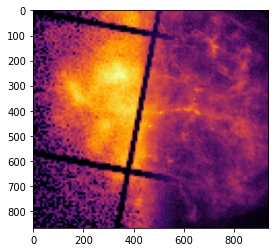

In [62]:
colormap = cm.get_cmap("inferno")
c_img = colormap(img)
plt.imsave("inferno_2.png", c_img)
plt.imshow(c_img)

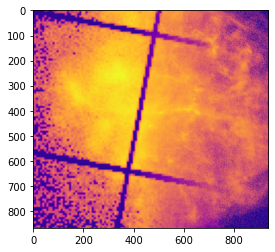

In [37]:
# In order to better see the details we can apply a stretching function, such as the square root
img_sqrt = np.sqrt(img)
img_sqrt = img_sqrt/np.max(img_sqrt) # Re-normalize
plasma_img_sqrt = plasma_colormap(img_sqrt)
plt.imshow(plasma_img_sqrt)
plt.show()

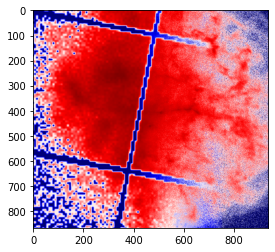

In [38]:
# An example with another colormap, in this case a diverging colormap
seismic_colormap = cm.get_cmap("seismic")
seismic_img_sqrt = seismic_colormap(img_sqrt)
plt.imshow(seismic_img_sqrt)
plt.show()